In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


2024-11-26 15:42:54.125905: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 15:42:54.131222: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 15:42:54.145042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 15:42:54.165525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 15:42:54.171730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 15:42:54.188841: I tensorflow/core/platform/cpu_feature_gu

In [5]:
def binarize(img):
    img = image.img_to_array(img, dtype='uint8')
    binarized = np.expand_dims(cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2), -1)
    inverted_binary_img = ~binarized
    return inverted_binary_img

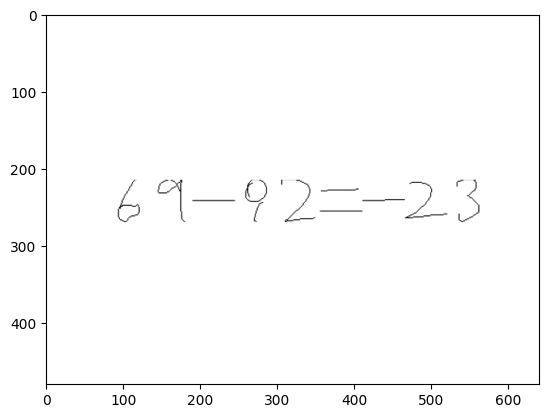

In [7]:
# binarize the input image
IMAGE = "2numbers_048.png"
img_path = "../equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0) 
# inverted_binary_img = binarize(input_image)
plt.imshow(input_image, cmap='gray')
plt.show()

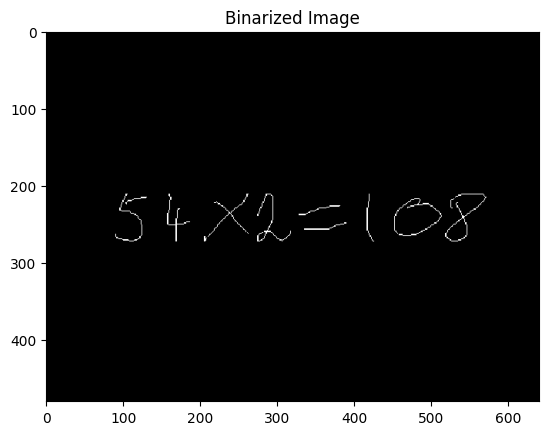

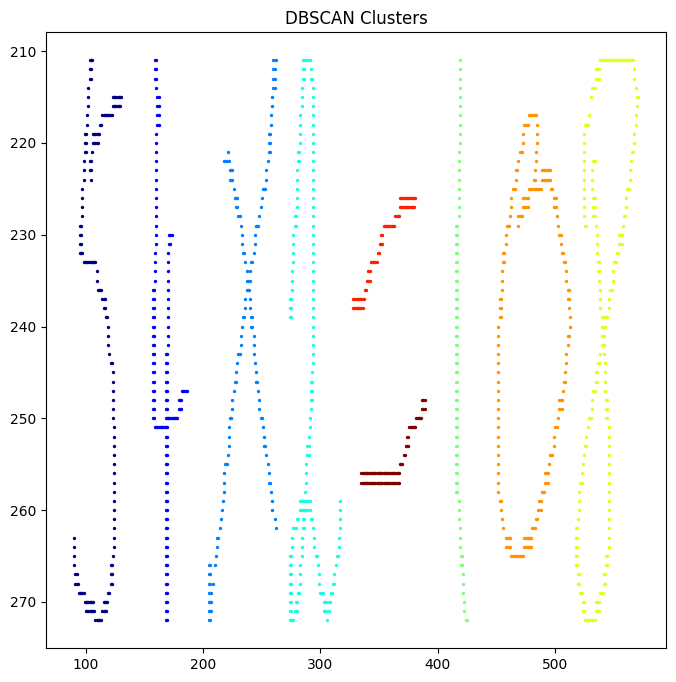

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the image in grayscale
img_path = "../equation_images/2numbers_049.png"
input_image = cv2.imread(img_path, 0)

# Binarize the image (thresholding)
_, binary_img = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY_INV)

# Display the binary image
plt.imshow(binary_img, cmap='gray')
plt.title("Binarized Image")
plt.show()

# Extract black pixel coordinates
black_pixels = np.column_stack(np.where(binary_img == 255))  # Coordinates of black pixels

# Run DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5).fit(black_pixels)
labels = dbscan.labels_

# Visualize the clusters
unique_labels = np.unique(labels)
plt.figure(figsize=(8, 8))
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'k'  # Black for noise
    else:
        color = plt.cm.jet(float(label) / max(unique_labels))  # Color based on label
    cluster_points = black_pixels[labels == label]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], c=[color], s=2)  # Flip axes for image coordinates

plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.title("DBSCAN Clusters")
plt.show()


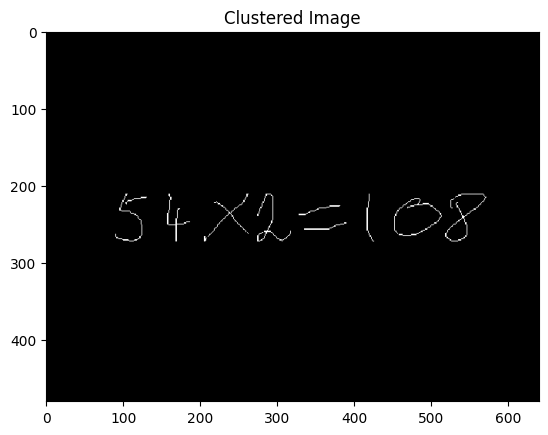

In [18]:
import cv2

# Create a blank image to display clusters
clustered_image = np.zeros_like(binary_img)

# Assign unique intensity values to each cluster
for label in np.unique(labels):
    if label == -1:  # Skip noise
        continue
    cluster_pixels = black_pixels[labels == label]
    for pixel in cluster_pixels:
        clustered_image[pixel[0], pixel[1]] = 255  # Mark the cluster pixels as white

# Display the clustered image
plt.imshow(clustered_image, cmap='gray')
plt.title("Clustered Image")
plt.show()


In [11]:
unique_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [19]:
import numpy as np
import cv2 as cv
im = cv.imread('../equation_images/2numbers_049.png')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

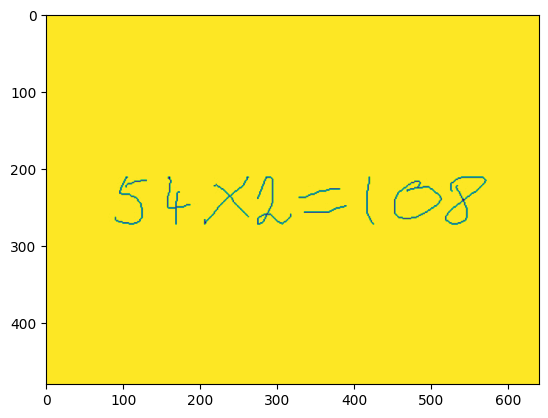

In [21]:
plt.imshow(imgray)

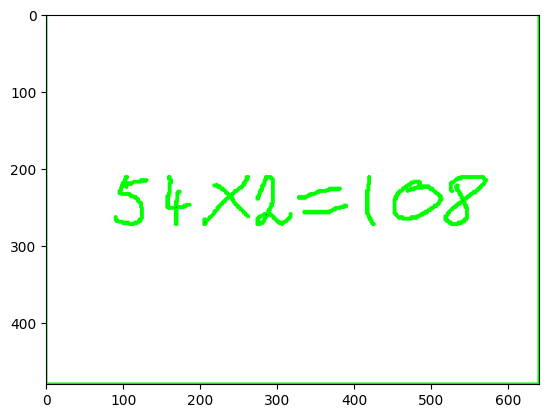

In [4]:
import numpy as np
import cv2 as cv

# Read the image
im = cv.imread('../equation_images/2numbers_049.png')
assert im is not None, "File could not be read, check with os.path.exists()"

# Convert to grayscale
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv.threshold(imgray, 127, 255, 0)

# Find contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contoured_image = im.copy()
plt.imshow(cv.drawContours(contoured_image, contours, -1, (0, 255, 0), 2))


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the image in grayscale
img_path = "../equation_images/2numbers_049.png"
input_image = cv2.imread(img_path, 0)

# Binarize the image (thresholding)
_, binary_img = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY_INV)


Number of connected components (excluding background): 1


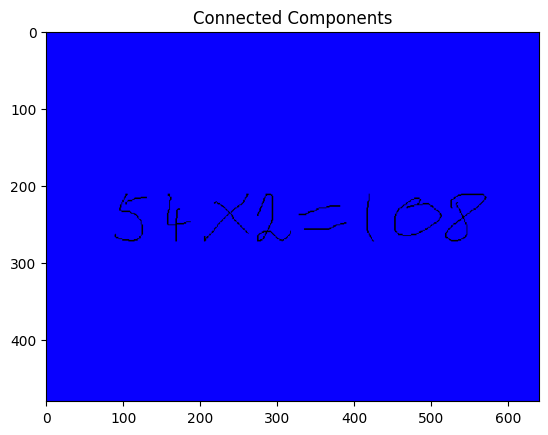

In [11]:
# Import the cv2 library
# Load the image in grayscale
img_path = "../equation_images/2numbers_049.png"
input_image = cv2.imread(img_path, 0)

# Binarize the image (thresholding)
_, binary_img = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY_INV)

# Choose 4 or 8 for connectivity type
connectivity = 8

# Perform the connected components analysis
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

# Get the results
num_labels = output[0]        # Number of labels
labels = output[1]            # Label matrix
stats = output[2]             # Stats matrix
centroids = output[3]         # Centroids

# Print the number of connected components (excluding the background)
print(f"Number of connected components (excluding background): {num_labels - 1}")

# Visualize the labeled regions
import numpy as np
import matplotlib.pyplot as plt

# Randomly color each component
label_hue = np.uint8(179 * labels / np.max(labels))  # Map labels to hue
blank_ch = 255 * np.ones_like(label_hue)            # Saturation and value channels
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0                     # Background to black

# Display the labeled image
plt.imshow(labeled_img)
plt.title("Connected Components")
plt.show()


In [12]:
img_path = "../equation_images/2numbers_049.png"

In [15]:
img=cv2.imread("../equation_images/2numbers_049.png",0) 
ret,thresh=cv2.threshold(img,127,255,0) 
edges=cv2.Canny(img,100,200) 

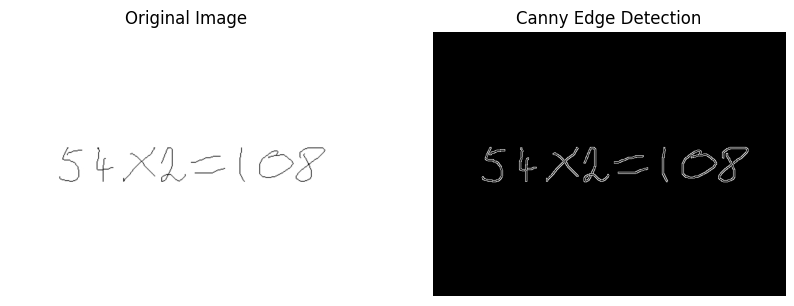

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "../equation_images/2numbers_049.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image was loaded
assert img is not None, "Image not found. Check the file path."

# Step 1: (Optional) Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Step 2: Apply Canny Edge Detection
# Adjust the thresholds (100, 200) based on your image for optimal edge detection
edges = cv2.Canny(blurred, 100, 200)

# Step 3: Visualize the edges
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Edges detected
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.show()


In [18]:
!pip install pytesseract Pillow 

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


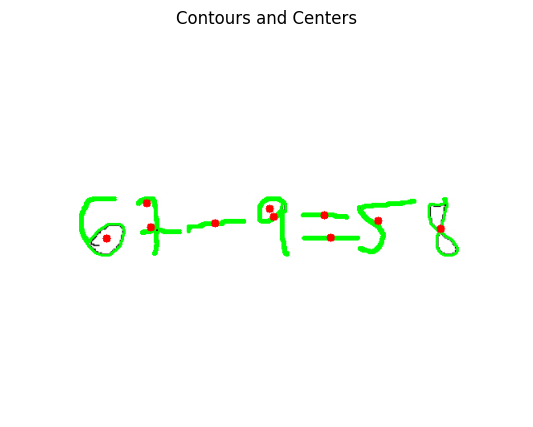

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "../equation_images/2numbers_030.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours
output_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Loop through contours to find the centers
for contour in contours:
    # Calculate moments
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Avoid division by zero
        cx = int(M["m10"] / M["m00"])  # x-coordinate of the center
        cy = int(M["m01"] / M["m00"])  # y-coordinate of the center

        # Draw the contour and its center
        cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)
        cv2.circle(output_image, (cx, cy), 5, (0, 0, 255), -1)  # Red center point

# Visualize the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Contours and Centers")
plt.axis('off')
plt.show()
